In [1]:
import os 
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
from matplotlib.patches import Patch

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (8, 8)
fontSize = 20

In [227]:
num = 5

### Load the Samples

In [228]:
samples_1 = np.loadtxt('Nz_Bayes/Nz_Bayes_Bootstrap_'+str(num)+'/Nz_Bayes_z0.1t0.3.asc')
samples_2 = np.loadtxt('Nz_Bayes/Nz_Bayes_Bootstrap_'+str(num)+'/Nz_Bayes_z0.3t0.5.asc')
samples_3 = np.loadtxt('Nz_Bayes/Nz_Bayes_Bootstrap_'+str(num)+'/Nz_Bayes_z0.5t0.7.asc')
samples_4 = np.loadtxt('Nz_Bayes/Nz_Bayes_Bootstrap_'+str(num)+'/Nz_Bayes_z0.7t0.9.asc')
samples_5 = np.loadtxt('Nz_Bayes/Nz_Bayes_Bootstrap_'+str(num)+'/Nz_Bayes_z0.9t1.2.asc')

In [229]:
samples_1.shape

(60, 5001)

In [230]:
def save_samples(files: list, num: int):
    
    # create folder to store the files 
    directory = 'Correlations/'
    os.makedirs(directory, exist_ok=True)
    
    # names of the different files 
    fnames = ['z0.1t0.3', 'z0.3t0.5', 'z0.5t0.7', 'z0.7t0.9', 'z0.9t1.2']
    
    # full path where we want to save the file
    path = os.path.join(directory, 'set_'+str(num))
    os.makedirs(path, exist_ok=True)
    
    # save each file
    for i, file in enumerate(files):
        data = pd.DataFrame(file)
        data.to_csv(path + '/' + fnames[i] + '.csv')

In [231]:
save_samples([samples_1, samples_2, samples_3, samples_4, samples_5], num)

### Calculate Means and Standard Deviations

In [232]:
mu_1 = np.mean(samples_1[:,1:], axis = 1)
mu_2 = np.mean(samples_2[:,1:], axis = 1)
mu_3 = np.mean(samples_3[:,1:], axis = 1)
mu_4 = np.mean(samples_4[:,1:], axis = 1)
mu_5 = np.mean(samples_5[:,1:], axis = 1)

In [233]:
sd_1 = np.std(samples_1[:,1:], axis = 1)
sd_2 = np.std(samples_2[:,1:], axis = 1)
sd_3 = np.std(samples_3[:,1:], axis = 1)
sd_4 = np.std(samples_4[:,1:], axis = 1)
sd_5 = np.std(samples_5[:,1:], axis = 1)

In [234]:
y_pos = np.arange(len(mu_1))
y_pos_mod = np.arange(0, len(mu_1)+2, 10)

# the redshift is the same for all
red = samples_1[:,0]
red_mod = np.arange(0, 3.5, 0.5)# red[::10]-0.025

In [235]:
legend_elements = [Patch(fill=False, edgecolor='salmon', label='Redshift Distribution 1'),
                  Patch(fill=False, edgecolor='skyblue', label='Redshift Distribution 2'),
                  Patch(fill=False, edgecolor='yellowgreen', label='Redshift Distribution 3'),
                  Patch(fill=False, edgecolor='silver', label='Redshift Distribution 4'),
                  Patch(fill=False, edgecolor='plum', label='Redshift Distribution 5')]

colors = ['salmon', 'skyblue', 'yellowgreen', 'silver', 'plum']

### Plot the redshift distribution for the 1000 samples

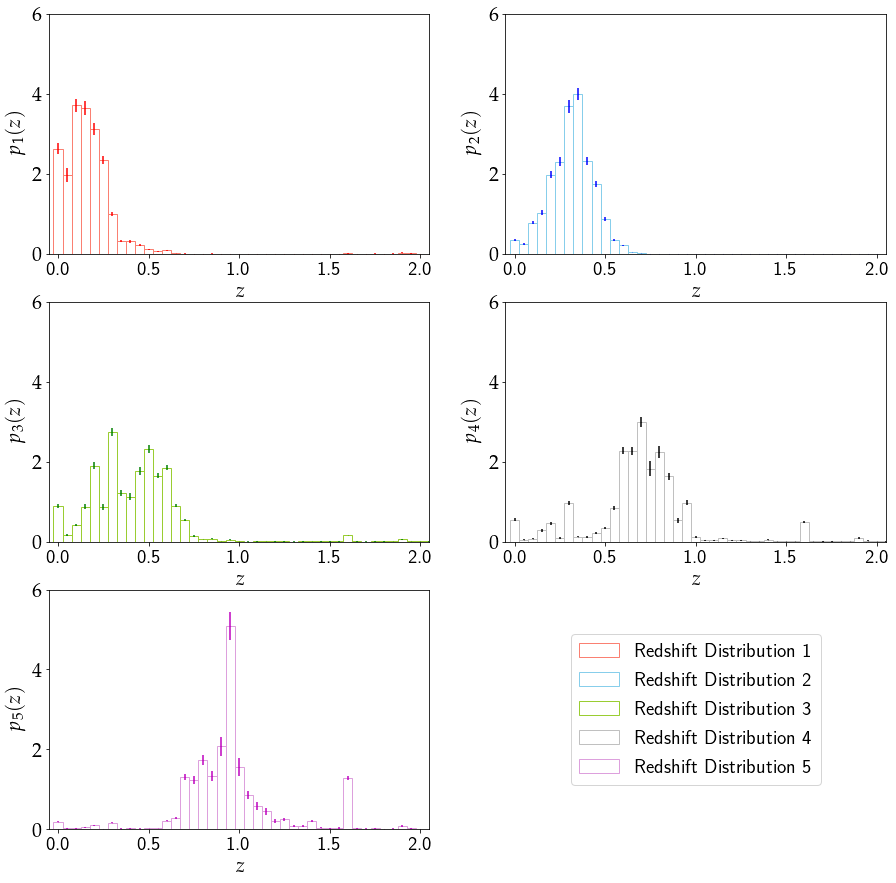

In [236]:
plt.figure(figsize=(15, 15))
plt.subplot(3,2,1)
plt.bar(y_pos, mu_1, width=1, edgecolor='salmon', fill=False)
plt.errorbar(y_pos, mu_1, yerr = sd_1, fmt = 'ro', ms = 0.1)
plt.ylabel(r'$p_{1}(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xticks(y_pos_mod, red_mod, fontsize=fontSize)
plt.xlim(-1,41)
plt.ylim(0.0, 6.0)

plt.subplot(3,2,2)
plt.bar(y_pos, mu_2, width=1, edgecolor='skyblue', fill=False)
plt.errorbar(y_pos, mu_2, yerr = sd_2, fmt = 'bo', ms = 0.1)
plt.ylabel(r'$p_{2}(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xticks(y_pos_mod, red_mod, fontsize=fontSize)
plt.xlim(-1,41)
plt.ylim(0.0, 6.0)

plt.subplot(3,2,3)
plt.bar(y_pos, mu_3, width=1, edgecolor='yellowgreen', fill=False)
plt.errorbar(y_pos, mu_3, yerr = sd_3, fmt = 'go', ms = 0.1)
plt.ylabel(r'$p_{3}(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xticks(y_pos_mod, red_mod, fontsize=fontSize)
plt.xlim(-1,41)
plt.ylim(0.0, 6.0)

plt.subplot(3,2,4)
plt.bar(y_pos, mu_4, width=1, edgecolor='silver', fill=False)
plt.errorbar(y_pos, mu_4, yerr = sd_4, fmt = 'ko', ms = 0.1)
plt.ylabel(r'$p_{4}(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xticks(y_pos_mod, red_mod, fontsize=fontSize)
plt.xlim(-1,41)
plt.ylim(0.0, 6.0)

plt.subplot(3,2,5)
plt.bar(y_pos, mu_5, width=1, edgecolor='plum', fill=False)
plt.errorbar(y_pos, mu_5, yerr = sd_5, fmt = 'mo', ms = 0.1)
plt.ylabel(r'$p_{5}(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xticks(y_pos_mod, red_mod, fontsize=fontSize)
plt.xlim(-1,41)
plt.ylim(0.0, 6.0)

plt.subplot(3,2,6)
plt.legend(handles=legend_elements, loc='center',prop={'family':'sans-serif', 'size':20})
plt.axis('off')

plt.savefig(f'plots/set_{num}/distributions_set_'+str(num)+'.pdf', bbox_inches = 'tight')
plt.show()

### Violin Plots

In [237]:
plot_samples = [samples_1[:,1:].T, samples_2[:,1:].T, samples_3[:,1:].T, samples_4[:,1:].T, samples_5[:,1:].T]
plot_mean = [mu_1, mu_2, mu_3, mu_4, mu_5]

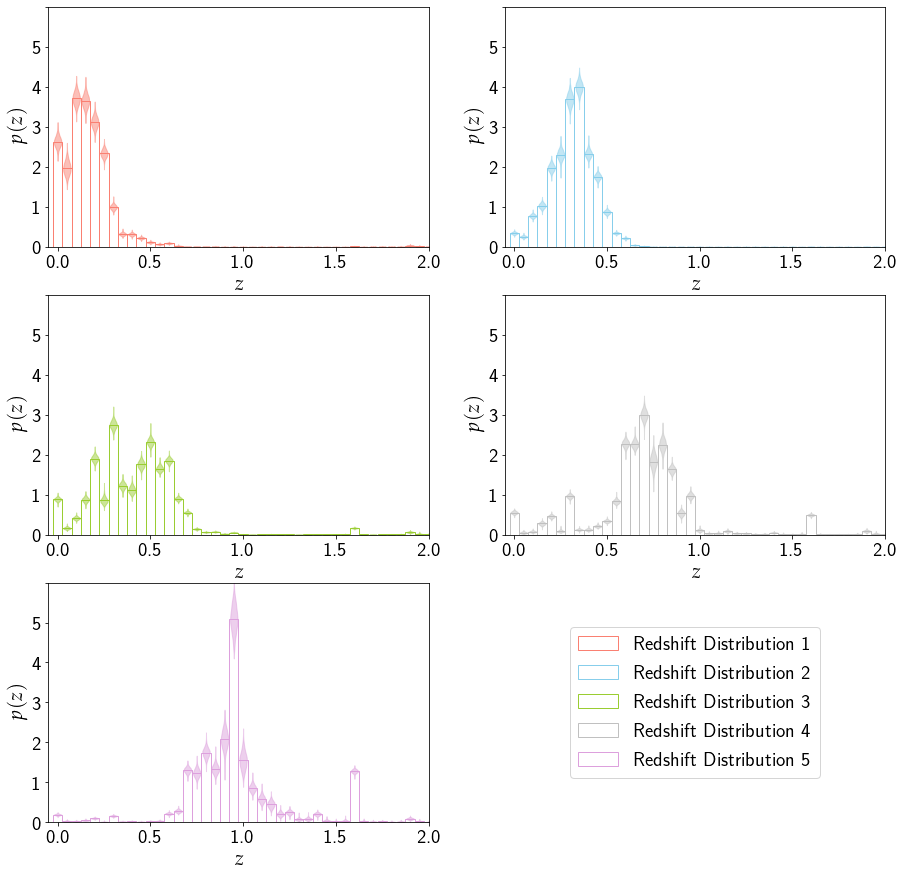

In [238]:
fig, ax = plt.subplots(3, 2, figsize = (15, 15))

counter = 0 
for i in range(3):
    for j in range(2):
        
        if counter <= 4:
            vp = ax[i, j].violinplot(plot_samples[counter], y_pos, widths=0.8, showmeans=False, showmedians=False, showextrema=False)
            for pc in vp['bodies']:
                pc.set_facecolor(colors[counter])
                pc.set_edgecolor(colors[counter])
                pc.set_alpha(0.5)
            ax[i,j].bar(y_pos, plot_mean[counter], width=1, edgecolor=colors[counter], fill=False)
            ax[i,j].get_xaxis().set_tick_params(direction='out')
            ax[i,j].xaxis.set_ticks_position('bottom')
            ax[i,j].set_xticks(y_pos_mod)
            ax[i,j].set_xticklabels(red_mod, fontsize = fontSize)
            ax[i,j].set_yticklabels(range(6), fontsize = fontSize)
            ax[i,j].set_xlabel('$z$', fontsize = fontSize)
            ax[i,j].set_ylabel('$p(z)$', fontsize = fontSize)
            ax[i,j].set_xlim(-1.0, 40 + 0.025)
            ax[i,j].set_ylim(0.0, 6.0)
        
        counter += 1
        
ax[2,1].legend(handles=legend_elements, loc='center',prop={'family':'sans-serif', 'size':20})
ax[2,1].axis('off')
plt.savefig(f'plots/set_{num}/violin_set_'+str(num)+'.pdf', bbox_inches = 'tight')
plt.show()

## Combine the 4 different sets into a single set

In [239]:
sets = [2, 3, 4, 5]

samples_1 = list()
samples_2 = list()
samples_3 = list()
samples_4 = list()
samples_5 = list()

for num in sets:
    s1 = np.loadtxt('Nz_Bayes/Nz_Bayes_Bootstrap_'+str(num)+'/Nz_Bayes_z0.1t0.3.asc')
    s2 = np.loadtxt('Nz_Bayes/Nz_Bayes_Bootstrap_'+str(num)+'/Nz_Bayes_z0.3t0.5.asc')
    s3 = np.loadtxt('Nz_Bayes/Nz_Bayes_Bootstrap_'+str(num)+'/Nz_Bayes_z0.5t0.7.asc')
    s4 = np.loadtxt('Nz_Bayes/Nz_Bayes_Bootstrap_'+str(num)+'/Nz_Bayes_z0.7t0.9.asc')
    s5 = np.loadtxt('Nz_Bayes/Nz_Bayes_Bootstrap_'+str(num)+'/Nz_Bayes_z0.9t1.2.asc')
    
    # s1, s2, s3, s4, s5 are of shapes [60, 1001], with the first column containing the redshift
    # so we append only the heights 
    samples_1.append(s1[:,1:])
    samples_2.append(s2[:,1:])
    samples_3.append(s3[:,1:])
    samples_4.append(s4[:,1:])
    samples_5.append(s5[:,1:])
    
samples_1 = np.concatenate(samples_1, axis = 1)
samples_2 = np.concatenate(samples_2, axis = 1)
samples_3 = np.concatenate(samples_3, axis = 1)
samples_4 = np.concatenate(samples_4, axis = 1)
samples_5 = np.concatenate(samples_5, axis = 1)

m1 = np.mean(samples_1, axis = 1).reshape(60, 1)
m2 = np.mean(samples_2, axis = 1).reshape(60, 1)
m3 = np.mean(samples_3, axis = 1).reshape(60, 1)
m4 = np.mean(samples_4, axis = 1).reshape(60, 1)
m5 = np.mean(samples_5, axis = 1).reshape(60, 1)

In [249]:
save_samples([samples_1, samples_2, samples_3, samples_4, samples_5], 6)

In [241]:
# the redshift is the same for all, so we pick one 
redshift = np.atleast_2d(s1[:,0]).T

In [242]:
bootstrap_1 = np.concatenate((redshift, samples_1), axis = 1)
bootstrap_2 = np.concatenate((redshift, samples_2), axis = 1)
bootstrap_3 = np.concatenate((redshift, samples_3), axis = 1)
bootstrap_4 = np.concatenate((redshift, samples_4), axis = 1)
bootstrap_5 = np.concatenate((redshift, samples_5), axis = 1)

In [243]:
mean_1 = np.concatenate((redshift, m1), axis = 1)
mean_2 = np.concatenate((redshift, m2), axis = 1)
mean_3 = np.concatenate((redshift, m3), axis = 1)
mean_4 = np.concatenate((redshift, m4), axis = 1)
mean_5 = np.concatenate((redshift, m5), axis = 1)

In [244]:
os.makedirs('Nz_Bayes/Nz_Bayes_Bootstrap_6/', exist_ok=True)
os.makedirs('Nz_Bayes/Nz_Bayes_Mean_6/', exist_ok=True)

In [245]:
np.savetxt('Nz_Bayes/Nz_Bayes_Bootstrap_6/Nz_Bayes_z0.1t0.3.asc', bootstrap_1, fmt='%1.5f')
np.savetxt('Nz_Bayes/Nz_Bayes_Bootstrap_6/Nz_Bayes_z0.3t0.5.asc', bootstrap_2, fmt='%1.5f')
np.savetxt('Nz_Bayes/Nz_Bayes_Bootstrap_6/Nz_Bayes_z0.5t0.7.asc', bootstrap_3, fmt='%1.5f')
np.savetxt('Nz_Bayes/Nz_Bayes_Bootstrap_6/Nz_Bayes_z0.7t0.9.asc', bootstrap_4, fmt='%1.5f')
np.savetxt('Nz_Bayes/Nz_Bayes_Bootstrap_6/Nz_Bayes_z0.9t1.2.asc', bootstrap_5, fmt='%1.5f')

In [246]:
np.savetxt('Nz_Bayes/Nz_Bayes_Mean_6/Nz_Bayes_z0.1t0.3.asc', mean_1, fmt='%1.5f')
np.savetxt('Nz_Bayes/Nz_Bayes_Mean_6/Nz_Bayes_z0.3t0.5.asc', mean_2, fmt='%1.5f')
np.savetxt('Nz_Bayes/Nz_Bayes_Mean_6/Nz_Bayes_z0.5t0.7.asc', mean_3, fmt='%1.5f')
np.savetxt('Nz_Bayes/Nz_Bayes_Mean_6/Nz_Bayes_z0.7t0.9.asc', mean_4, fmt='%1.5f')
np.savetxt('Nz_Bayes/Nz_Bayes_Mean_6/Nz_Bayes_z0.9t1.2.asc', mean_5, fmt='%1.5f')

#### Violin Plot for All Samples

In [247]:
plot_samples = [bootstrap_1[:,1:].T, bootstrap_2[:,1:].T, bootstrap_3[:,1:].T, bootstrap_4[:,1:].T, bootstrap_5[:,1:].T]
plot_mean = [m1[:,0], m2[:,0], m3[:,0], m4[:,0], m5[:,0]]

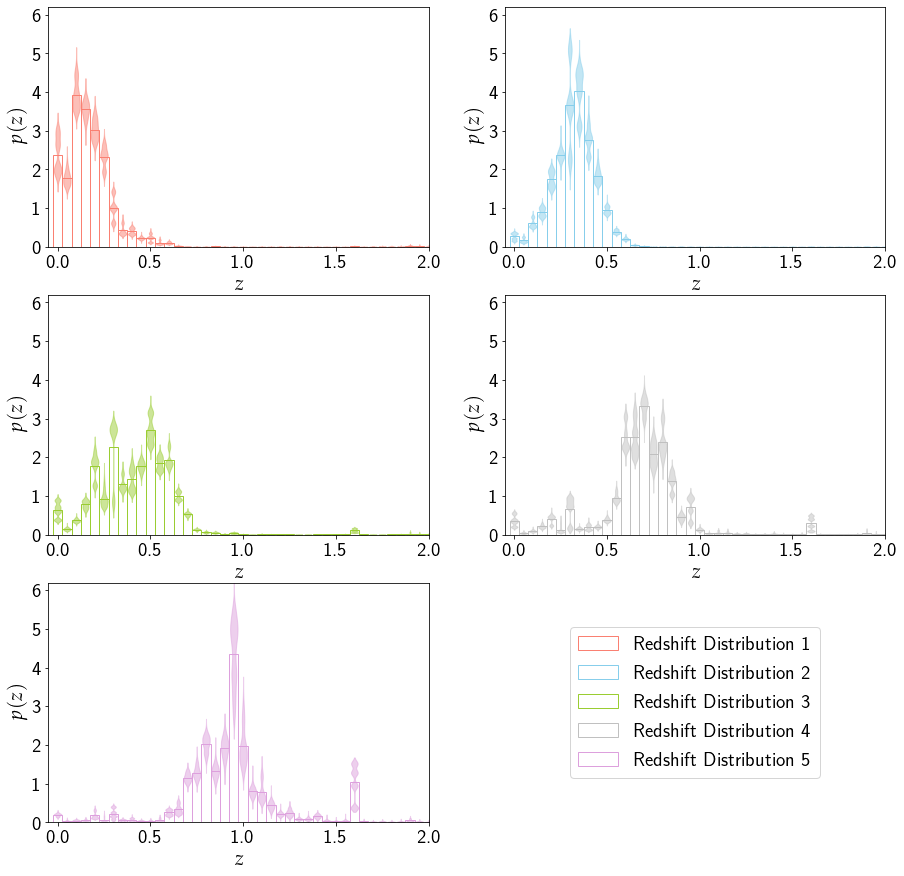

In [248]:
fig, ax = plt.subplots(3, 2, figsize = (15, 15))

counter = 0 
for i in range(3):
    for j in range(2):
        
        if counter <= 4:
            vp = ax[i, j].violinplot(plot_samples[counter], y_pos, widths=0.8, showmeans=False, showmedians=False, showextrema=False)
            for pc in vp['bodies']:
                pc.set_facecolor(colors[counter])
                pc.set_edgecolor(colors[counter])
                pc.set_alpha(0.5)
            ax[i,j].bar(y_pos, plot_mean[counter], width=1, edgecolor=colors[counter], fill=False)
            ax[i,j].get_xaxis().set_tick_params(direction='out')
            ax[i,j].xaxis.set_ticks_position('bottom')
            ax[i,j].set_xticks(y_pos_mod)
            ax[i,j].set_xticklabels(red_mod, fontsize = fontSize)
            ax[i,j].set_yticklabels(range(7), fontsize = fontSize)
            ax[i,j].set_xlabel('$z$', fontsize = fontSize)
            ax[i,j].set_ylabel('$p(z)$', fontsize = fontSize)
            ax[i,j].set_xlim(-1.0, 40 + 0.025)
            ax[i,j].set_ylim(0.0, 6.2)
        
        counter += 1
        
ax[2,1].legend(handles=legend_elements, loc='center',prop={'family':'sans-serif', 'size':20})
ax[2,1].axis('off')
os.makedirs('plots/set_6/', exist_ok=True)
plt.savefig('plots/set_6/violin_combined.pdf', bbox_inches = 'tight')
plt.show()

# George's Full Samples

In [58]:
gs_1 = np.loadtxt(gpath + f'Nz_DIR{num}/Nz_DIR{num}_Bootstrap/Nz_z0.1t0.3_FULL_DIR{num}.asc')
gs_2 = np.loadtxt(gpath + f'Nz_DIR{num}/Nz_DIR{num}_Bootstrap/Nz_z0.3t0.5_FULL_DIR{num}.asc')
gs_3 = np.loadtxt(gpath + f'Nz_DIR{num}/Nz_DIR{num}_Bootstrap/Nz_z0.5t0.7_FULL_DIR{num}.asc')
gs_4 = np.loadtxt(gpath + f'Nz_DIR{num}/Nz_DIR{num}_Bootstrap/Nz_z0.7t0.9_FULL_DIR{num}.asc')
gs_5 = np.loadtxt(gpath + f'Nz_DIR{num}/Nz_DIR{num}_Bootstrap/Nz_z0.9t1.2_FULL_DIR{num}.asc')

In [59]:
gs_mu_1 = np.mean(gs_1[:,1:], axis = 1)
gs_mu_2 = np.mean(gs_2[:,1:], axis = 1)
gs_mu_3 = np.mean(gs_3[:,1:], axis = 1)
gs_mu_4 = np.mean(gs_4[:,1:], axis = 1)
gs_mu_5 = np.mean(gs_5[:,1:], axis = 1)

In [60]:
gs_sd_1 = np.std(gs_1[:,1:], axis = 1)
gs_sd_2 = np.std(gs_2[:,1:], axis = 1)
gs_sd_3 = np.std(gs_3[:,1:], axis = 1)
gs_sd_4 = np.std(gs_4[:,1:], axis = 1)
gs_sd_5 = np.std(gs_5[:,1:], axis = 1)

### Plot George's Mean and Mean of 1000 samples

In [61]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='y', lw=4, label = 'Mean of 1000 samples'),
                Line2D([0], [0], color='k', lw=4, linestyle='--', label = 'Mean (George)')]

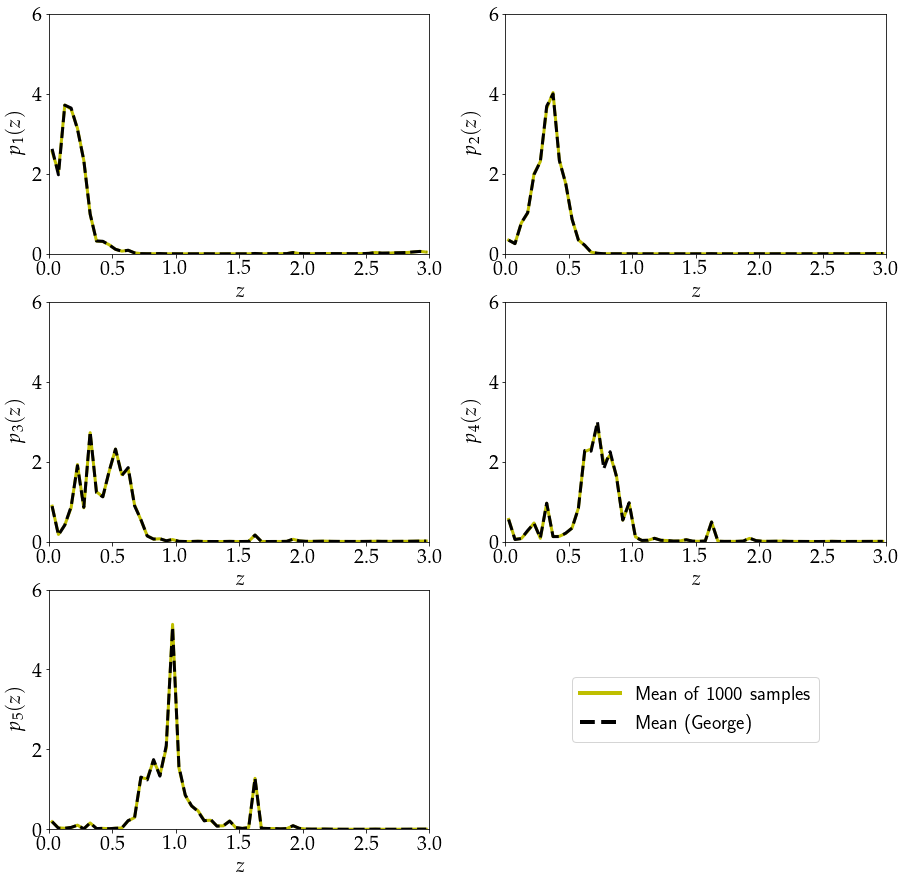

In [62]:
plt.figure(figsize=(15, 15))
plt.subplot(3,2,1)
plt.plot(red, mu_1, lw = 3, c = 'y')
plt.plot(red, gs_mu_1, lw = 3, linestyle = '--', c = 'k')
plt.ylabel(r'$p_{1}(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(0, 3)
plt.ylim(0.0, 6.0)

plt.subplot(3,2,2)
plt.plot(red, mu_2, lw = 3, c = 'y')
plt.plot(red, gs_mu_2, lw = 3, linestyle = '--', c = 'k')
plt.ylabel(r'$p_{2}(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(0, 3)
plt.ylim(0.0, 6.0)

plt.subplot(3,2,3)
plt.plot(red, mu_3, lw = 3, c = 'y')
plt.plot(red, gs_mu_3, lw = 3, linestyle = '--', c = 'k')
plt.ylabel(r'$p_{3}(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(0, 3)
plt.ylim(0.0, 6.0)

plt.subplot(3,2,4)
plt.plot(red, mu_4, lw = 3, c = 'y')
plt.plot(red, gs_mu_4, lw = 3, linestyle = '--', c = 'k')
plt.ylabel(r'$p_{4}(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(0, 3)
plt.ylim(0.0, 6.0)

plt.subplot(3,2,5)
plt.plot(red, mu_5, lw = 3, c = 'y')
plt.plot(red, gs_mu_5, lw = 3, linestyle = '--', c = 'k')
plt.ylabel(r'$p_{5}(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(0, 3)
plt.ylim(0.0, 6.0)

plt.subplot(3,2,6)
plt.legend(handles=custom_lines, loc='center',prop={'family':'sans-serif', 'size':20})
plt.axis('off')

# plt.savefig('Plots/mean_mine_george_'+str(num)+'.pdf', bbox_inches = 'tight')
plt.show()

# Plot the Mean of the Sets

In [91]:
def KL(P,Q):
    epsilon = 0.00001

    # You may want to instead make copies to avoid changing the np arrays.
    P = P+epsilon
    Q = Q+epsilon

    divergence = np.sum(P*np.log(P/Q))
    return divergence

In [92]:
sets = [1, 2, 3, 4, 5]

samples_1 = list()
samples_2 = list()
samples_3 = list()
samples_4 = list()
samples_5 = list()

mean_1 = list()
mean_2 = list()
mean_3 = list()
mean_4 = list()
mean_5 = list()

for num in sets:
    s1 = np.loadtxt('Nz_Bayes/Nz_Bayes_Bootstrap_'+str(num)+'/Nz_Bayes_z0.1t0.3.asc')
    s2 = np.loadtxt('Nz_Bayes/Nz_Bayes_Bootstrap_'+str(num)+'/Nz_Bayes_z0.3t0.5.asc')
    s3 = np.loadtxt('Nz_Bayes/Nz_Bayes_Bootstrap_'+str(num)+'/Nz_Bayes_z0.5t0.7.asc')
    s4 = np.loadtxt('Nz_Bayes/Nz_Bayes_Bootstrap_'+str(num)+'/Nz_Bayes_z0.7t0.9.asc')
    s5 = np.loadtxt('Nz_Bayes/Nz_Bayes_Bootstrap_'+str(num)+'/Nz_Bayes_z0.9t1.2.asc')
    
    # s1, s2, s3, s4, s5 are of shapes [60, 1001], with the first column containing the redshift
    # so we append only the heights 
    samples_1.append(s1[:,1:])
    samples_2.append(s2[:,1:])
    samples_3.append(s3[:,1:])
    samples_4.append(s4[:,1:])
    samples_5.append(s5[:,1:])
    
    # record the mean of each set 
    mean_1.append(np.mean(samples_1[num-1], axis = 1))
    mean_2.append(np.mean(samples_2[num-1], axis = 1))
    mean_3.append(np.mean(samples_3[num-1], axis = 1))
    mean_4.append(np.mean(samples_4[num-1], axis = 1))
    mean_5.append(np.mean(samples_5[num-1], axis = 1))

In [93]:
for i in range(5):
    for j in range(i+1):
        kl_val = KL(mean_1[i], mean_1[j])
        print(i,j, '|', '{0:.3f}'.format(kl_val))
    
    print('-'*20)

0 0 | 0.000
--------------------
1 0 | 0.399
1 1 | 0.000
--------------------
2 0 | 0.374
2 1 | 0.459
2 2 | 0.000
--------------------
3 0 | 0.877
3 1 | 0.840
3 2 | 0.680
3 3 | 0.000
--------------------
4 0 | 0.616
4 1 | 0.284
4 2 | 0.522
4 3 | 0.428
4 4 | 0.000
--------------------


In [98]:
for i in range(5):
    for j in range(i+1):
        kl_val = KL(mean_2[i], mean_2[j])
        print(i,j, '|', '{0:.3f}'.format(kl_val))
    
    print('-'*20)

0 0 | 0.000
--------------------
1 0 | 0.256
1 1 | 0.000
--------------------
2 0 | 0.678
2 1 | 0.605
2 2 | 0.000
--------------------
3 0 | 1.680
3 1 | 1.430
3 2 | 0.484
3 3 | 0.000
--------------------
4 0 | 0.997
4 1 | 0.676
4 2 | 0.292
4 3 | 0.575
4 4 | 0.000
--------------------


In [99]:
for i in range(5):
    for j in range(i+1):
        kl_val = KL(mean_3[i], mean_3[j])
        print(i,j, '|', '{0:.3f}'.format(kl_val))
    
    print('-'*20)

0 0 | 0.000
--------------------
1 0 | 0.492
1 1 | 0.000
--------------------
2 0 | 0.922
2 1 | 0.544
2 2 | 0.000
--------------------
3 0 | 2.641
3 1 | 1.297
3 2 | 1.155
3 3 | 0.000
--------------------
4 0 | 1.517
4 1 | 0.883
4 2 | 0.255
4 3 | 1.397
4 4 | 0.000
--------------------


In [100]:
for i in range(5):
    for j in range(i+1):
        kl_val = KL(mean_4[i], mean_4[j])
        print(i,j, '|', '{0:.3f}'.format(kl_val))
    
    print('-'*20)

0 0 | 0.000
--------------------
1 0 | 0.563
1 1 | 0.000
--------------------
2 0 | 2.004
2 1 | 1.439
2 2 | 0.000
--------------------
3 0 | 1.615
3 1 | 0.952
3 2 | 0.963
3 3 | 0.000
--------------------
4 0 | 2.859
4 1 | 2.047
4 2 | 0.496
4 3 | 1.326
4 4 | 0.000
--------------------


In [101]:
for i in range(5):
    for j in range(i+1):
        kl_val = KL(mean_5[i], mean_5[j])
        print(i,j, '|', '{0:.3f}'.format(kl_val))
    
    print('-'*20)

0 0 | 0.000
--------------------
1 0 | 0.558
1 1 | 0.000
--------------------
2 0 | 2.531
2 1 | 2.573
2 2 | 0.000
--------------------
3 0 | 1.736
3 1 | 1.324
3 2 | 0.782
3 3 | 0.000
--------------------
4 0 | 2.765
4 1 | 2.459
4 2 | 0.384
4 3 | 0.719
4 4 | 0.000
--------------------


In [102]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=colors[i], lw=4, label = f'Set {i+1}') for i in range(5)]

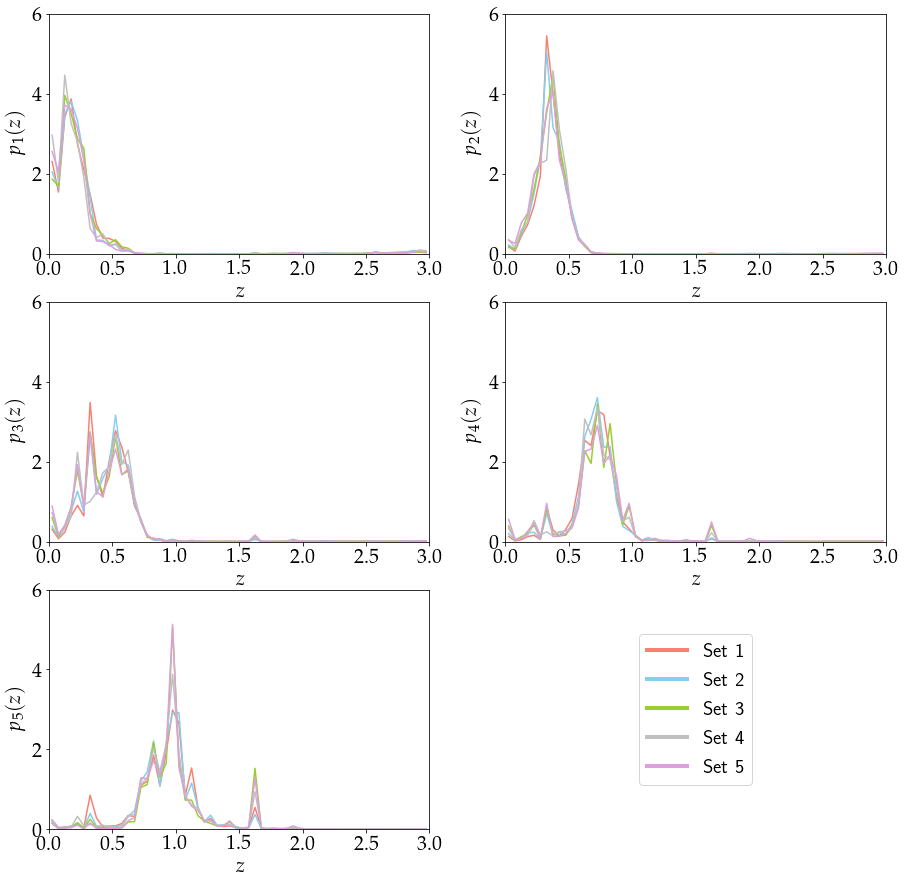

In [103]:
plt.figure(figsize=(15, 15))
plt.subplot(3,2,1)
for i in range(5):
    plt.plot(red, mean_1[i], lw = 1.5, color=colors[i])
plt.ylabel(r'$p_{1}(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(0, 3)
plt.ylim(0.0, 6.0)

plt.subplot(3,2,2)
for i in range(5):
    plt.plot(red, mean_2[i], lw = 1.5, color=colors[i])
plt.ylabel(r'$p_{2}(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(0, 3)
plt.ylim(0.0, 6.0)

plt.subplot(3,2,3)
for i in range(5):
    plt.plot(red, mean_3[i], lw = 1.5, color=colors[i])
plt.ylabel(r'$p_{3}(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(0, 3)
plt.ylim(0.0, 6.0)

plt.subplot(3,2,4)
for i in range(5):
    plt.plot(red, mean_4[i], lw = 1.5, color=colors[i])
plt.ylabel(r'$p_{4}(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(0, 3)
plt.ylim(0.0, 6.0)

plt.subplot(3,2,5)
for i in range(5):
    plt.plot(red, mean_5[i], lw =1.5, color=colors[i])
plt.ylabel(r'$p_{5}(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(0, 3)
plt.ylim(0.0, 6.0)

plt.subplot(3,2,6)
plt.legend(handles=custom_lines, loc='center',prop={'family':'sans-serif', 'size':20})
plt.axis('off')

# plt.savefig('Plots/mean_of_all_sets.pdf', bbox_inches = 'tight')
plt.show()